# Pre-processing steps

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [63]:
data = pd.read_csv(r'auto-mpg.csv')

In [64]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [65]:
data.describe(include = 'all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,104.914573,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,38.368723,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,130.000000,3608.000000,17.175000,79.000000,2.000000,NaN


In [66]:
data = data.drop(['car name'], axis =1)

In [67]:
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [68]:
data.corr()['mpg']

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
horsepower     -0.761353
weight         -0.831741
acceleration    0.420289
model year      0.579267
origin          0.563450
Name: mpg, dtype: float64

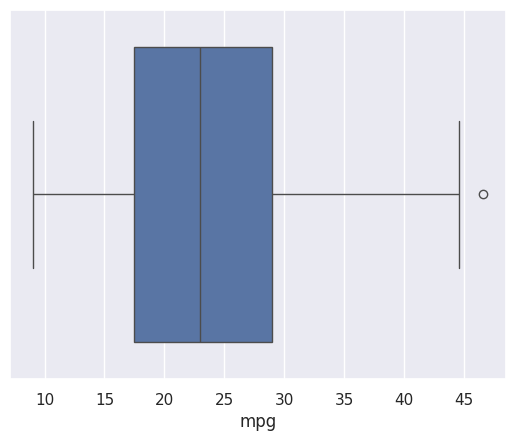

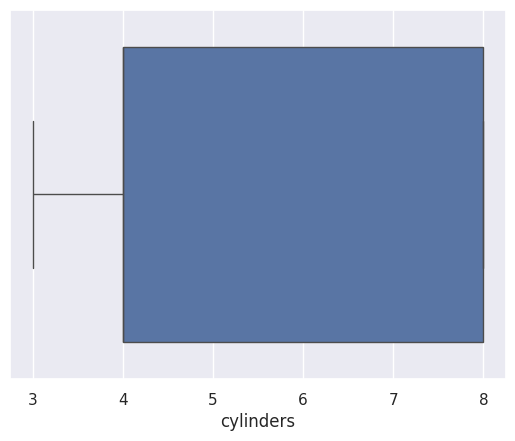

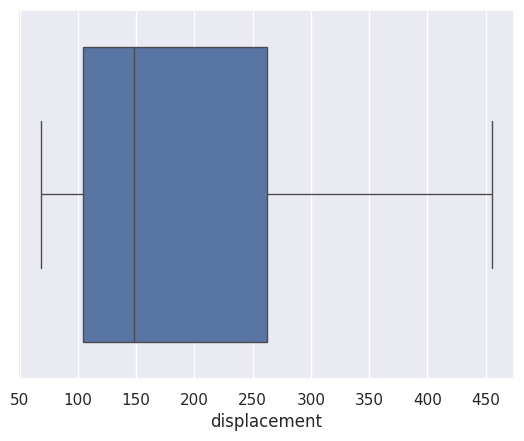

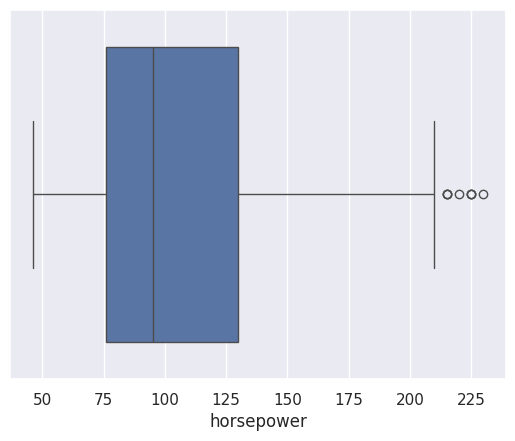

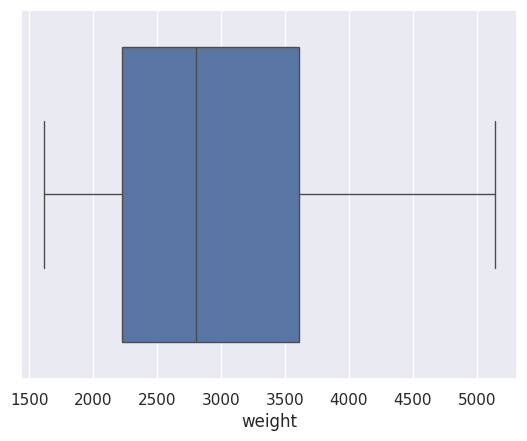

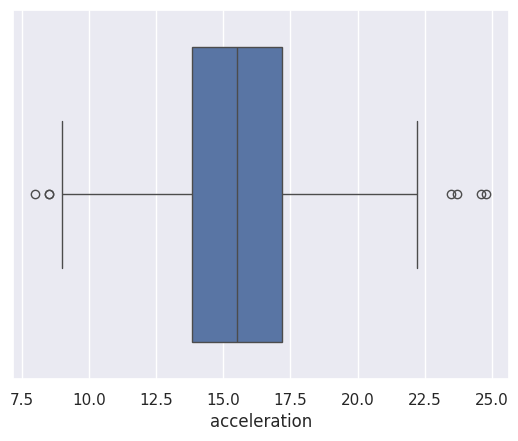

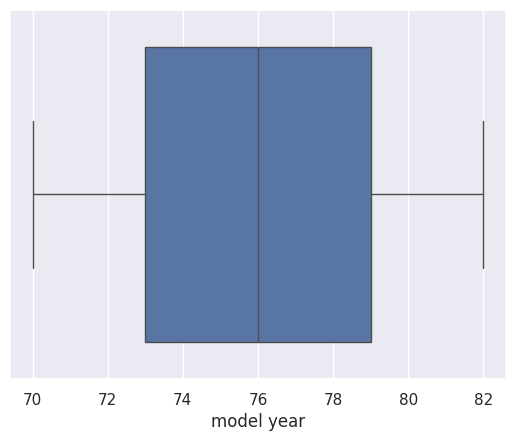

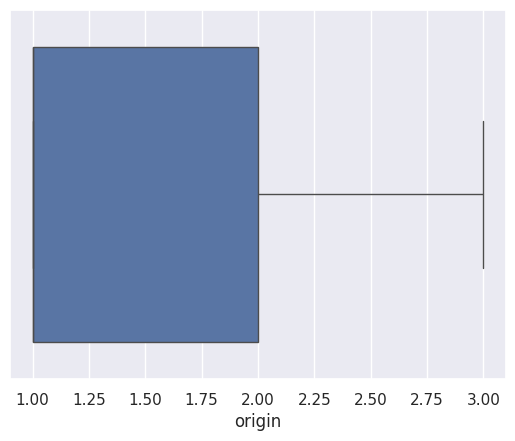

In [69]:
for i in data.columns:
  sns.boxplot(data = data, x = data[i])
  plt.show()

In [70]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3 - q1

Lower = q1 - 1.5*IQR
Upper = q3 + 1.5*IQR


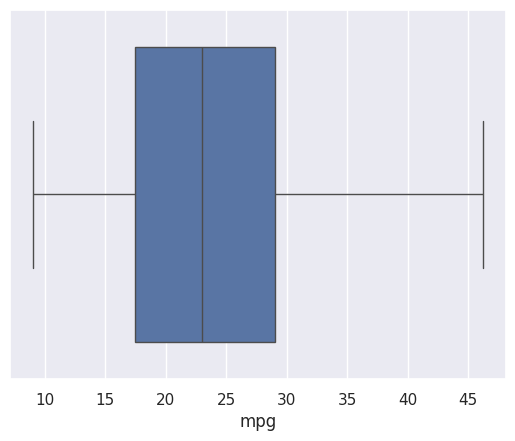

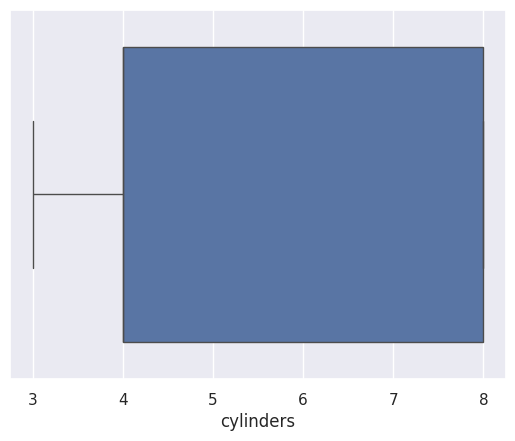

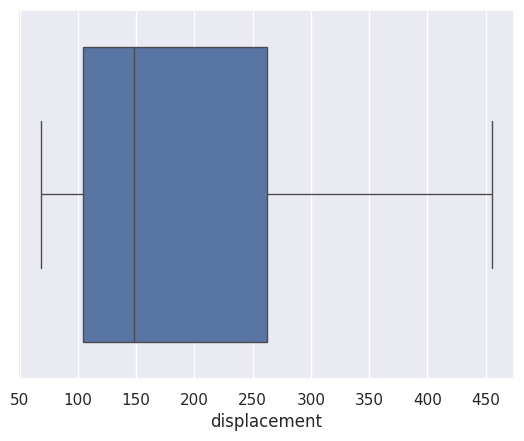

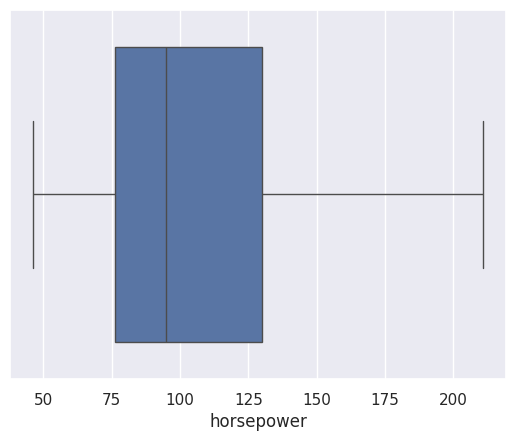

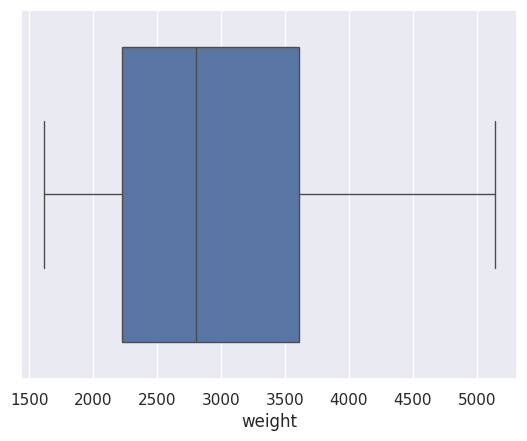

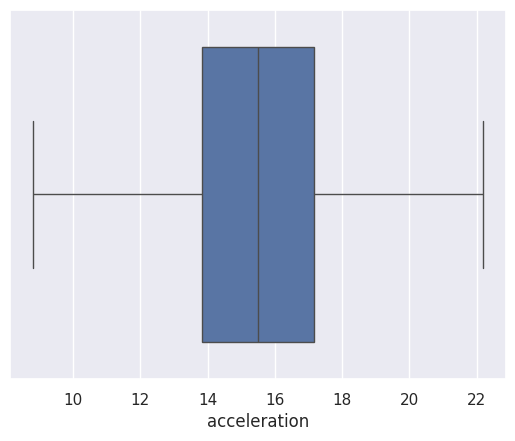

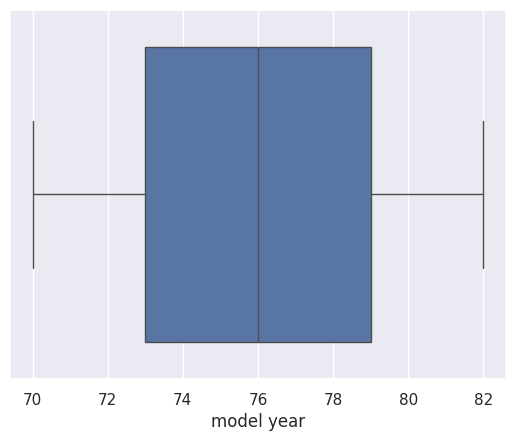

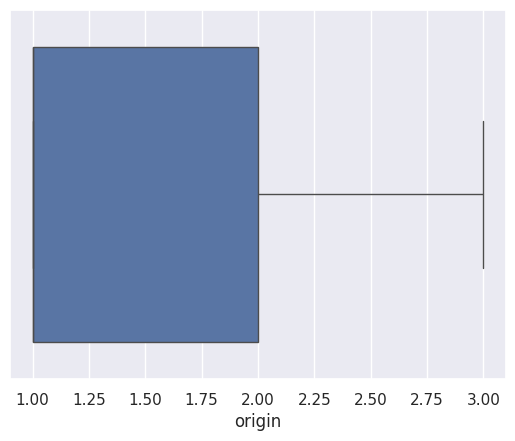

In [71]:
for i in data.columns:
  data[i] = np.where(data[i] > Upper[i], Upper[i], data[i])
  data[i] = np.where(data[i] < Lower[i], Lower[i], data[i])
  sns.boxplot(data = data, x = data[i])
  plt.show()

In [72]:
df_corr = data.corr()
df = pd.DataFrame(df_corr['mpg'])
df

,mpg
mpg,1.000000
cylinders,-0.775556
displacement,-0.804353
horsepower,-0.767082
weight,-0.831901
acceleration,0.418333
model year,0.579337
origin,0.563436


In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[[#'cylinders',
                  'displacement',
                  #'horsepower',
                  #'weight',
                  #'acceleration',
                  #'model year',
                  'origin']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif



,VIF,Features
0,1.745376,displacement
1,1.745376,origin


# Modeling Steps

In [74]:
output = data['mpg']
inputs = data[['displacement', 'origin']]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(inputs , output, test_size = 0.3, random_state = 42 )

In [76]:
from sklearn import metrics

def evaluate(model, X_test, y_test):

  y_pred = model.predict(X_test)

  mae_test = metrics.mean_absolute_error(y_test, y_pred)
  mse_test = metrics.mean_squared_error(y_test, y_pred)
  rmse_test = np.sqrt(mse_test)
  r2_test = metrics.r2_score(y_test, y_pred)


  y_pred_train = model.predict(X_train)

  mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
  mse_train = metrics.mean_squared_error(y_train, y_pred_train)
  rmse_train = np.sqrt(mse_train)
  r2_train = metrics.r2_score(y_train, y_pred_train)


  results_dict = {
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Train': [mae_train, mse_train, rmse_train, r2_train*100],
        'Test': [mae_test, mse_test, rmse_test, r2_test*100]
    }

  results_df = pd.DataFrame(results_dict)

  print(results_df)


In [77]:
first_model = RandomForestRegressor(random_state = 42)
first_model.fit(X_train, y_train)

first_accuracy = evaluate(first_model, X_test, y_test)

  Metric      Train       Test
0    MAE   2.186912   3.166884
1    MSE   8.812690  17.737768
2   RMSE   2.968618   4.211623
3     R2  85.875541  69.093316


In [78]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
min_samples_split = [2, 5, 8]
min_samples_leaf = [1, 2, 5]

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 144, 188, 233, 277, 322, 366, 411, 455, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 19, 28, 37, 46, 55, 64, 73, 82, 91, 100], 'min_samples_split': [2, 5, 8], 'min_samples_leaf': [1, 2, 5]}


In [79]:
rf_random = RandomizedSearchCV(estimator = first_model, param_distributions = random_grid, n_iter = 100, cv = 5, verbose = 1, random_state = 42, n_jobs = -1)

In [80]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [100, 144, 188, 233,
                                                         277, 322, 366, 411,
                                                         455, 500]},
                   random_state=42, verbose=1)

In [81]:
rf_random.best_params_

{'n_estimators': 455,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 73}

In [82]:
optimized_model = rf_random.best_estimator_
optimized_accuracy = evaluate(optimized_model, X_test, y_test)

  Metric      Train       Test
0    MAE   2.749571   2.963678
1    MSE  14.715703  14.914487
2   RMSE   3.836105   3.861928
3     R2  76.414542  74.012663


# Univariate analysis

In [83]:
variables = []
train_r2_scores = []
test_r2_scores = []

for i in X_train.columns:
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    optimized_model.fit(X_train_single_var, y_train)
    y_pred_train_single_var = optimized_model.predict(X_train_single_var)


    train_r2 = metrics.r2_score(y_train, y_pred_train_single_var)
    y_pred_test_single_var = optimized_model.predict(X_test_single_var)


    test_r2 = metrics.r2_score(y_test, y_pred_test_single_var)


    variables.append(i)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)



results_df = pd.DataFrame({'Variable': variables, 'Train R2': train_r2_scores, 'Test R2': test_r2_scores})

results_df_sorted = results_df.sort_values(by='Test R2', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted

,Variable,Train R2,Test R2
0,displacement,0.7613,0.7240
1,origin,0.3556,0.2711
